**Abstract**

The following dataset was extracted from Central Statistics Office (CSO) whose information captures the estimated migration statistic for various countries, categorized by sex and year which include statistical category, year, country, sex, migration from origin or destination, the unit of measures corresponding in thousands.

**Statistic label:** specifies the type of migration statistic.

**Year:** represent the year for which migration data is recorded.

**Country:** Countries involved in the migration process.

**Sex:** specifies genders as both sexes, Males and Female.

**Origin and destination:** describe the type of migration (Net migration, emigrants, or immigrants.

**Unit:** it measures the migration values on thousands.

**Values:** Indicates the numerical values of the migration statistic. 


**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt    

from scipy.stats import binom
from scipy.stats import norm

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

**Load dataset**

In [2]:
df = pd.read_csv("PEA18.20231004T171039.csv")

## Exploratory data analysis

Displaying first 5 observations of the dataset.

In [3]:
df.head()

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Net migration,Thousand,-13.7
1,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Emigrants: All destinations,Thousand,21.8
2,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Immigrants: All origins,Thousand,8.1
3,Estimated Migration (Persons in April),1987,United Kingdom (1),Male,Net migration,Thousand,-9.0
4,Estimated Migration (Persons in April),1987,United Kingdom (1),Male,Emigrants: All destinations,Thousand,13.1


Displaying the bottom 5 rows 

In [4]:
df.tail()

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
2659,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Male,Emigrants: All destinations,Thousand,3.6
2660,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Male,Immigrants: All origins,Thousand,3.9
2661,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Female,Net migration,Thousand,-0.2
2662,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Female,Emigrants: All destinations,Thousand,5.2
2663,Estimated Migration (Persons in April),2023,EU15 to EU27 (accession countries joined post ...,Female,Immigrants: All origins,Thousand,5.0


Displaying number of features and observations of the dataset.

In [5]:
df.shape

(2664, 7)

Obtaining basic information about the dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATISTIC Label        2664 non-null   object 
 1   Year                   2664 non-null   int64  
 2   Country                2664 non-null   object 
 3   Sex                    2664 non-null   object 
 4   Origin or Destination  2664 non-null   object 
 5   UNIT                   2664 non-null   object 
 6   VALUE                  2104 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 145.8+ KB


Data types of features in dataset for categorical and numerical values

In [7]:
df.dtypes

STATISTIC Label           object
Year                       int64
Country                   object
Sex                       object
Origin or Destination     object
UNIT                      object
VALUE                    float64
dtype: object

Displaying descriptive statistics for relevant investigation such central tendency, spread and distribution of the numerical features “Year” and “Value” to identify outliers and any other relevant information that will be displayed in details in the analysis. 

In [8]:
df.describe()

,Year,VALUE
count,2664.000000,2104.000000
mean,2005.000000,8.943726
std,10.679083,15.513703
min,1987.000000,-43.900000
25%,1996.000000,1.800000
50%,2005.000000,4.700000
75%,2014.000000,10.200000
max,2023.000000,151.100000


Summary statistics for categorical values with parameter in 0 to determine the frequency of relevant variables.

In [9]:
object_statistics = df.describe(include='O')
print(object_statistics)

                               STATISTIC Label             Country  \
count                                     2664                2664   
unique                                       1                   8   
top     Estimated Migration (Persons in April)  United Kingdom (1)   
freq                                      2664                 333   

               Sex Origin or Destination      UNIT  
count         2664                  2664      2664  
unique           3                     3         1  
top     Both sexes         Net migration  Thousand  
freq           888                   888      2664  


Detecting Outliers: 

<AxesSubplot:xlabel='VALUE'>

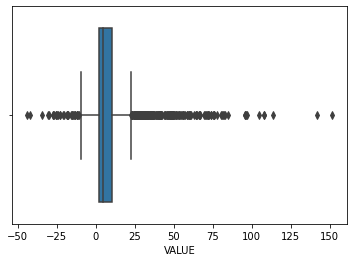

In [10]:
sns.boxplot(x=df["VALUE"]) 

Checking for duplicate values.

In [11]:
df.duplicated().sum()

0

Counting available observations per feature.

In [12]:
df.count()

STATISTIC Label          2664
Year                     2664
Country                  2664
Sex                      2664
Origin or Destination    2664
UNIT                     2664
VALUE                    2104
dtype: int64

Checking for missing values, the "VALUE" is missing 560 entries due to possible missing information in the data entry.

In [13]:
df.isnull().sum()

STATISTIC Label            0
Year                       0
Country                    0
Sex                        0
Origin or Destination      0
UNIT                       0
VALUE                    560
dtype: int64

Imputing the missing values with median as statistic summary suggest there might be outliers present. 

In [14]:
df['VALUE'].fillna(df['VALUE'].median(), inplace=True)
missing_values_after_imputation = df['VALUE'].isnull().sum()
print("Missing values after imputation:", missing_values_after_imputation)

Missing values after imputation: 0


Dropping irrelevant columns that do not contribute significaly to the main goal.

In [15]:
df = df.drop(["STATISTIC Label","UNIT"], axis=1) 
df.head(5) 

,Year,Country,Sex,Origin or Destination,VALUE
0,1987,United Kingdom (1),Both sexes,Net migration,-13.7
1,1987,United Kingdom (1),Both sexes,Emigrants: All destinations,21.8
2,1987,United Kingdom (1),Both sexes,Immigrants: All origins,8.1
3,1987,United Kingdom (1),Male,Net migration,-9.0
4,1987,United Kingdom (1),Male,Emigrants: All destinations,13.1


Listing the countries by groups to understand how Country variable is represented

In [16]:
unique_countries = df['Country'].unique()
print(unique_countries)

['United Kingdom (1)' 'United States' 'Canada' 'Australia'
 'Other countries (23)' 'All countries' 'EU14 excl Irl (UK & Ireland)'
 'EU15 to EU27 (accession countries joined post 2004)']


EU15 to EU27 after the 2004 enlargement. The accession countries that joined post-2004 are Bulgaria and Romania


Listing the Sex by groups to understand how the variable is represented

In [17]:
unique_sex = df['Sex'].unique()
print(unique_sex)

['Both sexes' 'Male' 'Female']


Replacing the name of the column Origin or destination 

In [18]:
df['Origin or Destination'] = df['Origin or Destination'].str.replace('Emigrants: All destinations', 'Emigrants')
df['Origin or Destination'] = df['Origin or Destination'].str.replace('Immigrants: All origins', 'Immigrants')

Renaming column of Origin or Destination for better visibility

In [19]:
df = df.rename(columns={'Origin or Destination': 'Migration', 'VALUE': 'Value'})

Fixing the strings for Country

In [20]:
def clean_country_name(country):
    return country.split('(')[0].strip()

df['Country'] =df['Country'].apply(clean_country_name)
print(df)

      Year         Country         Sex      Migration  Value
0     1987  United Kingdom  Both sexes  Net migration  -13.7
1     1987  United Kingdom  Both sexes      Emigrants   21.8
2     1987  United Kingdom  Both sexes     Immigrants    8.1
3     1987  United Kingdom        Male  Net migration   -9.0
4     1987  United Kingdom        Male      Emigrants   13.1
...    ...             ...         ...            ...    ...
2659  2023    EU15 to EU27        Male      Emigrants    3.6
2660  2023    EU15 to EU27        Male     Immigrants    3.9
2661  2023    EU15 to EU27      Female  Net migration   -0.2
2662  2023    EU15 to EU27      Female      Emigrants    5.2
2663  2023    EU15 to EU27      Female     Immigrants    5.0

[2664 rows x 5 columns]


In [21]:
df.head(10)

,Year,Country,Sex,Migration,Value
0,1987,United Kingdom,Both sexes,Net migration,-13.7
1,1987,United Kingdom,Both sexes,Emigrants,21.8
2,1987,United Kingdom,Both sexes,Immigrants,8.1
3,1987,United Kingdom,Male,Net migration,-9.0
4,1987,United Kingdom,Male,Emigrants,13.1
5,1987,United Kingdom,Male,Immigrants,4.1
6,1987,United Kingdom,Female,Net migration,-4.7
7,1987,United Kingdom,Female,Emigrants,8.7
8,1987,United Kingdom,Female,Immigrants,4.0
9,1987,United States,Both sexes,Net migration,-6.9


## Statistical analysis

Descriptive statistic

In [22]:
df.describe()

,Year,Value
count,2664.000000,2664.000000
mean,2005.000000,8.051652
std,10.679083,13.894412
min,1987.000000,-43.900000
25%,1996.000000,2.500000
50%,2005.000000,4.700000
75%,2014.000000,8.000000
max,2023.000000,151.100000


## Outliers

In [23]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_columns]

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
outlier_values = df[outliers].dropna(how="all")
print(outlier_values)

      Year Country  Sex Migration  Value
0      NaN     NaN  NaN       NaN  -13.7
1      NaN     NaN  NaN       NaN   21.8
3      NaN     NaN  NaN       NaN   -9.0
9      NaN     NaN  NaN       NaN   -6.9
45     NaN     NaN  NaN       NaN  -23.0
...    ...     ...  ...       ...    ...
2642   NaN     NaN  NaN       NaN   66.1
2643   NaN     NaN  NaN       NaN   42.6
2644   NaN     NaN  NaN       NaN   32.9
2645   NaN     NaN  NaN       NaN   75.5
2648   NaN     NaN  NaN       NaN   17.7

[388 rows x 5 columns]


In [24]:
outliers = df.loc[df['Value'] > 50]  
print(outliers)

      Year        Country         Sex      Migration  Value
118   1988  All countries  Both sexes      Emigrants   61.1
190   1989  All countries  Both sexes      Emigrants   70.6
262   1990  All countries  Both sexes      Emigrants   56.3
983   2000  All countries  Both sexes     Immigrants   52.6
1055  2001  All countries  Both sexes     Immigrants   59.0
...    ...            ...         ...            ...    ...
2637  2023  All countries  Both sexes  Net migration   77.7
2638  2023  All countries  Both sexes      Emigrants   64.0
2639  2023  All countries  Both sexes     Immigrants  141.6
2642  2023  All countries        Male     Immigrants   66.1
2645  2023  All countries      Female     Immigrants   75.5

[62 rows x 5 columns]


Calculate the outlier per Emigrants and Inmmigrants

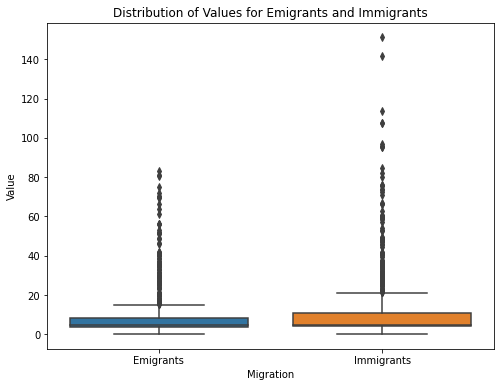

In [25]:
outlier_subset = df[df['Migration'].isin(['Emigrants', 'Immigrants'])]
plt.figure(figsize=(8, 6))
sns.boxplot(x='Migration', y='Value', data=outlier_subset)
plt.title('Distribution of Values for Emigrants and Immigrants')
plt.xlabel('Migration')
plt.ylabel('Value')
plt.show()

In [26]:
mean_val= df['Value'].mean()
print(mean_val)

8.051651651651651


In [27]:
trend = df["Value"].mode()
print(trend)

0    4.7
Name: Value, dtype: float64


In [28]:
mode = df['Value'].mode()
print(mode)

0    4.7
Name: Value, dtype: float64


Calculating the mean average of the'Value' variable indicates the average of 8.943726 for particular aspect of the migration dataset being measured. Since the migration of the dataset is divided by Net migration, immigrants and emigrants.It would be good to measure and plot how the Migration column is distributed. 

**Analising the Migration variables** calculate the measure of central tendency for the rows of Migration column to have a better understanding of the statisticals analysis. 

Calculate the mean of Net migration to determine the net inflow of people. A possitive value indicate that on average 3.61 people have moved into a geographic area. This is an important indicator to determine any pattern into the population growth. 

In [29]:
net_migration_data = df[df['Migration'] == 'Net migration']
mean_net_migration = net_migration_data['Value'].mean()
print("Mean Net Migration:", mean_net_migration)

Mean Net Migration: 3.60686936936937


Calculate the average of Inmigration. In average the number of migration are 11.76 of immigrants. 

In [30]:
Immigrants_data = df[df['Migration'] == 'Immigrants']
mean_Immigrants = Immigrants_data['Value'].mean()
print("Mean Immigrants:", mean_Immigrants)

Mean Immigrants: 11.761373873873874


Calculate the average of Emigrants. The average for emigration is 8.78

In [31]:
Emigrants_data = df[df['Migration'] == 'Emigrants']
mean_Emigrants = Emigrants_data['Value'].mean()
print("Mean Emigrants:", mean_Emigrants)

Mean Emigrants: 8.786711711711712


Calculate the relative frequency of Migration variable to understand the distribution of the categorical values. The frequency indicates that 888 occur for the three unique values: Net migration, emigrants and immigrants with a relative frequency of 0.33% 

In [32]:
value_counts = df['Migration'].value_counts()
relative_frequencies = value_counts / len(df)

In [33]:
subtable = pd.DataFrame({'Migration': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,Migration,Frequency,Relative Frequency
0,Net migration,888,0.333333
1,Emigrants,888,0.333333
2,Immigrants,888,0.333333


Preparing the Migration variable for plotting divided by subgroups 

In [34]:
df_locations = df.groupby('Migration', axis = 0).sum()
df_locations

,Year,Country,Sex,Value
Migration,,,,
Emigrants,1780440,United KingdomUnited KingdomUnited KingdomUnit...,Both sexesMaleFemaleBoth sexesMaleFemaleBoth s...,7802.6
Immigrants,1780440,United KingdomUnited KingdomUnited KingdomUnit...,Both sexesMaleFemaleBoth sexesMaleFemaleBoth s...,10444.1
Net migration,1780440,United KingdomUnited KingdomUnited KingdomUnit...,Both sexesMaleFemaleBoth sexesMaleFemaleBoth s...,3202.9


Plotting the migration varible per value. 

Text(0.5, 1.0, 'Migration rate thousand')

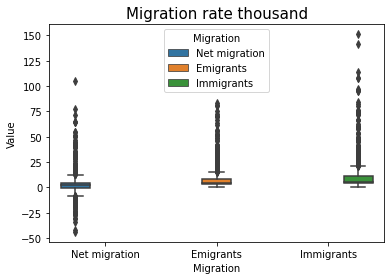

In [35]:
sns.boxplot(x = 'Migration', y ='Value', data=df, hue = 'Migration')
plt.title('Migration rate thousand', fontsize=15)

Plotting the migration per Year

Text(0.5, 1.0, 'Migration rate')

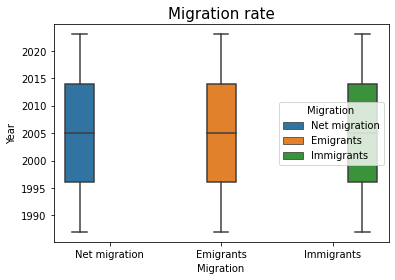

In [36]:
sns.boxplot(x = 'Migration', y ='Year', data=df, hue = 'Migration')
plt.title('Migration rate', fontsize=15)

In [37]:
df_locations.reset_index(inplace=True)

In [38]:
df_locations.columns = ['Migration','Year', 'Country', 'Sex', 'Value']
df_locations.columns

Index(['Migration', 'Year', 'Country', 'Sex', 'Value'], dtype='object')

Plotting a bar chart of migration values 

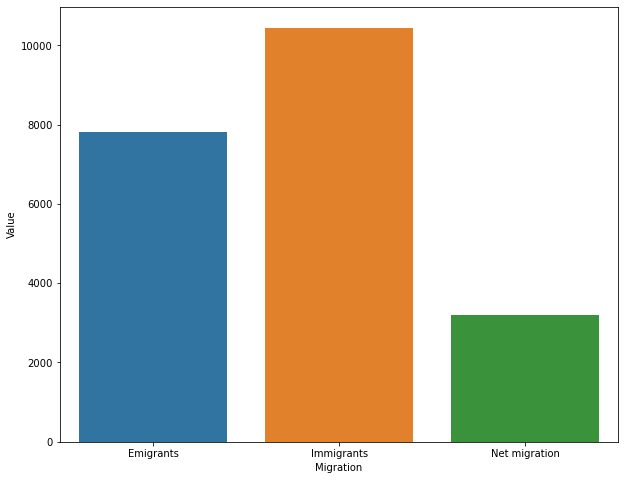

In [39]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Migration", y="Value", data=df_locations)

Plotting a pie chart to see the inmmigration by category

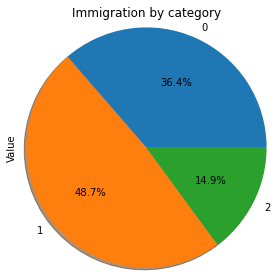

In [40]:
df_locations['Value'].plot(kind='pie', radius=1.2, autopct='%1.1f%%', shadow = True)

plt.title('Immigration by category')
plt.tight_layout()

Subgrouping the Country variables to determine how is the distribution 

In [41]:
df_locations = df.groupby('Country', axis = 0).sum()
df_locations

,Year,Sex,Migration,Value
Country,,,,
All countries,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,9330.1
Australia,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,1291.9
Canada,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,1063.4
EU14 excl Irl,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,1469.1
EU15 to EU27,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,2247.4
Other countries,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,2833.4
United Kingdom,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,2488.3
United States,667665,Both sexesBoth sexesBoth sexesMaleMaleMaleFema...,Net migrationEmigrantsImmigrantsNet migrationE...,726.0


Plotting a bar chart for visibility per country and migration variables. It seems that migrants has a demand in the United Kingdom. 

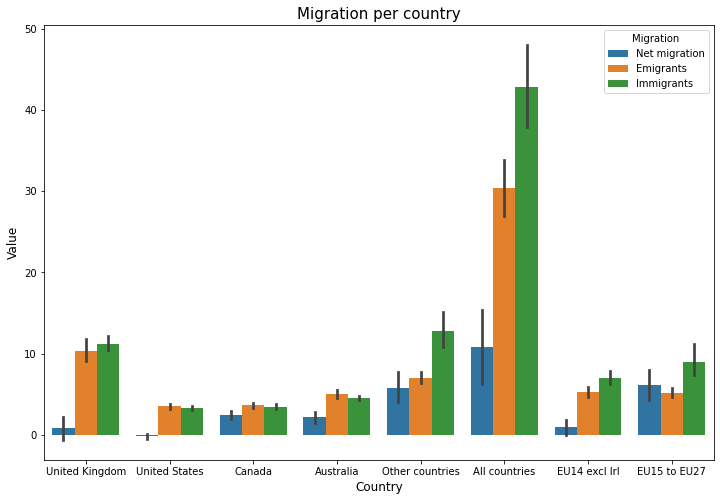

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Value', data=df, hue='Migration')
plt.title('Migration per country', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()


Plotting a bar chart for the gender distribution 

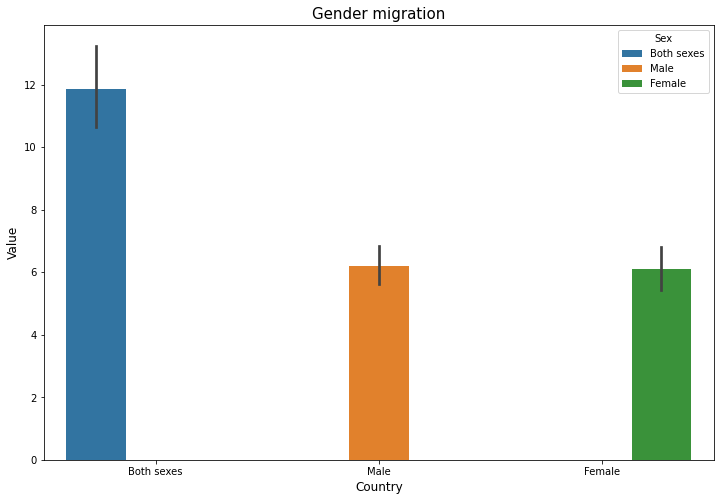

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Sex', y='Value', data=df, hue='Sex')
plt.title('Gender migration', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()

Historigram of migration values

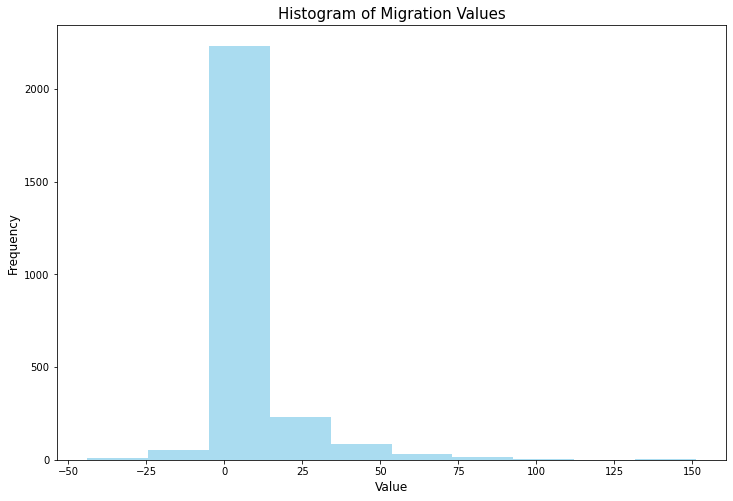

In [44]:
plt.figure(figsize=(12, 8))
plt.hist(df['Value'], bins=10, alpha=0.7, color='skyblue')
plt.title('Histogram of Migration Values', fontsize=15)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Calculate the the migration values along the years. It seems 2007 and 2023 

In [45]:
migration_rate_per_year = df.groupby('Year')['Value'].sum()
print(migration_rate_per_year)


Year
1987     214.8
1988     201.4
1989     236.5
1990     297.3
1991     323.2
1992     448.4
1993     401.2
1994     363.8
1995     375.8
1996     434.6
1997     476.8
1998     489.3
1999     513.6
2000     543.7
2001     588.8
2002     662.1
2003     607.0
2004     594.7
2005     761.0
2006     947.2
2007    1293.3
2008     908.1
2009     589.0
2010     334.4
2011     426.1
2012     458.6
2013     501.4
2014     532.1
2015     607.1
2016     658.7
2017     762.7
2018     767.6
2019     776.8
2020     764.8
2021     592.4
2022     862.4
2023    1132.9
Name: Value, dtype: float64


Plotting the migration per year to visualise the fluctiation and peaks durong the years 

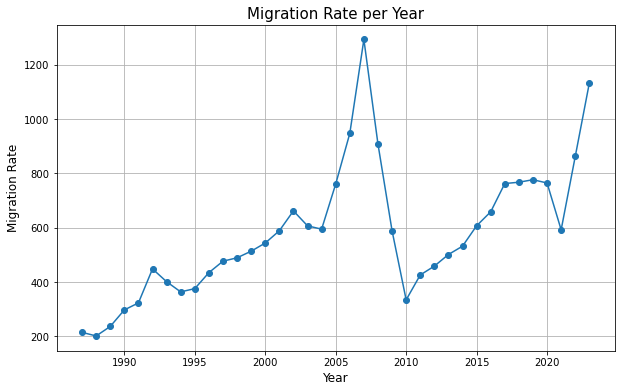

In [46]:
plt.figure(figsize=(10, 6))
migration_rate_per_year.plot(kind='line', marker='o')
plt.title('Migration Rate per Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Migration Rate', fontsize=12)
plt.grid()
plt.show()

Migration Assumptions: Ireland’s net migration rate has been fluctuating over the years. Between 2005 and 2010, Ireland experienced a positive net migration rate, which means that more people immigrated to Ireland than emigrated from it. The exact reasons for this trend are not clear, but it could be due to a combination of factors such as the country’s economic growth, job opportunities, and quality of life.

Migration per country

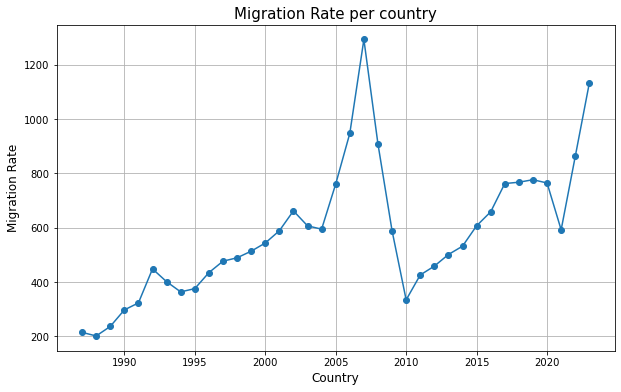

In [47]:
plt.figure(figsize=(10, 6))
migration_rate_per_year.plot(kind='line', marker='o')
plt.title('Migration Rate per country', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Migration Rate', fontsize=12)
plt.grid()
plt.show()

Calculate the trends of immigrants & emigrants over the years

In [48]:
immigration_per_year = df[df['Migration'] == 'Immigrants'].groupby('Year')['Value'].sum()
migration_per_year = df[df['Migration'] == 'Emigrants'].groupby('Year')['Value'].sum()

print("Immigration per year:")
print(immigration_per_year)

print("Emigrants per year:")
print(migration_per_year)


Immigration per year:
Year
1987    103.4
1988    109.4
1989    131.7
1990    151.7
1991    151.6
1992    205.2
1993    181.3
1994    162.7
1995    167.2
1996    199.0
1997    220.4
1998    226.1
1999    237.9
2000    252.6
2001    278.7
2002    309.9
2003    282.5
2004    276.2
2005    366.5
2006    459.5
2007    632.6
2008    454.0
2009    294.7
2010    167.3
2011    213.2
2012    229.0
2013    250.7
2014    266.3
2015    303.6
2016    329.4
2017    381.4
2018    383.8
2019    388.4
2020    382.4
2021    296.2
2022    431.2
2023    566.4
Name: Value, dtype: float64
Emigrants per year:
Year
1987    172.4
1988    235.2
1989    263.3
1990    220.4
1991    157.7
1992    175.8
1993    182.8
1994    181.6
1995    174.8
1996    167.0
1997    143.7
1998    156.6
1999    168.3
2000    148.8
2001    147.4
2002    144.5
2003    159.4
2004    148.3
2005    146.0
2006    172.3
2007    213.5
2008    196.8
2009    288.0
2010    276.8
2011    322.5
2012    332.3
2013    325.4
2014    299.8
2015    27

Plotting a line chart to visualise the immigration and emigration trends over the years

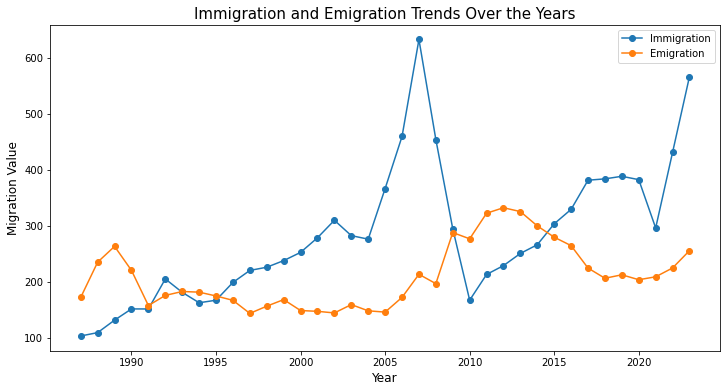

In [49]:
immigration_per_year = df[df['Migration'] == 'Immigrants'].groupby('Year')['Value'].sum()
emigration_per_year = df[df['Migration'] == 'Emigrants'].groupby('Year')['Value'].sum()

years_immigration = immigration_per_year.index.to_numpy()
years_emigration = emigration_per_year.index.to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(years_immigration, immigration_per_year.values, label='Immigration', marker='o')
plt.plot(years_emigration, emigration_per_year.values, label='Emigration', marker='o')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Migration Value', fontsize=12)
plt.title('Immigration and Emigration Trends Over the Years', fontsize=15)
plt.legend()  
plt.show()

## Discrete distribution

**Binomal distribution**

Renaming the dataframe for statistical calculations, to transform the non interger value in a whole number only for the statistical analysis.

In [50]:
stat=df

Rounding the numerical features "Value"

In [51]:
stat['Value'] = df['Value'].round()
print(stat)

      Year         Country         Sex      Migration  Value
0     1987  United Kingdom  Both sexes  Net migration  -14.0
1     1987  United Kingdom  Both sexes      Emigrants   22.0
2     1987  United Kingdom  Both sexes     Immigrants    8.0
3     1987  United Kingdom        Male  Net migration   -9.0
4     1987  United Kingdom        Male      Emigrants   13.0
...    ...             ...         ...            ...    ...
2659  2023    EU15 to EU27        Male      Emigrants    4.0
2660  2023    EU15 to EU27        Male     Immigrants    4.0
2661  2023    EU15 to EU27      Female  Net migration   -0.0
2662  2023    EU15 to EU27      Female      Emigrants    5.0
2663  2023    EU15 to EU27      Female     Immigrants    5.0

[2664 rows x 5 columns]


**Probability of distribution of Female being immigrants in 2007**

**N** Calculating the Number of trials: the total of immigrants in 2007 

In [52]:
total_immigrants_2007 = df.loc[stat['Year'] == 2007, 'Value'].sum()

print("Total immigrants in 2007:", total_immigrants_2007)


Total immigrants in 2007: 1298.0


**P** Calculating the probability of success in a single trial for Female

In [53]:
total_immigrants_2007 = df.loc[df['Year'] == 2007, 'Value'].sum()
female_immigrants_2007 = df.loc[(df['Year'] == 2007) & (df['Sex'] == 'Female'), 'Value'].sum()

probability_female_2007 = female_immigrants_2007 / total_immigrants_2007

print("Probability of immigrants being female in 2007:", probability_female_2007)


Probability of immigrants being female in 2007: 0.24114021571648692


**K** Calculating the number of success outcomes for Female

In [54]:
n = total_immigrants_2007  
p = probability_female_2007  
k = female_immigrants_2007  

probability = binom.pmf(k, n, p)

print("Probability of exactly {} females in 2007: {}".format(k, probability))


Probability of exactly 313.0 females in 2007: 0.025878115158308457


**Probability of distribution of Male being immigrants in 2007**

**P** Calculating the probability of success in a single trial for Male

In [55]:
total_immigrants_2007 = df.loc[df['Year'] == 2007, 'Value'].sum()
male_immigrants_2007 = df.loc[(df['Year'] == 2007) & (df['Sex'] == 'Male'), 'Value'].sum()

probability_male_2007 = male_immigrants_2007 / total_immigrants_2007

print("Probability of immigrants being male in 2007:", probability_male_2007)

Probability of immigrants being male in 2007: 0.2696456086286595


**K** Calculating the number of success outcomes for Male

In [56]:
n = total_immigrants_2007  
p = probability_female_2007  
k = male_immigrants_2007  

probability = binom.pmf(k, n, p)

print("Probability of exactly {} Male in 2007: {}".format(k, probability))

Probability of exactly 350.0 Male in 2007: 0.0015029372815633117


Probability of Gender 

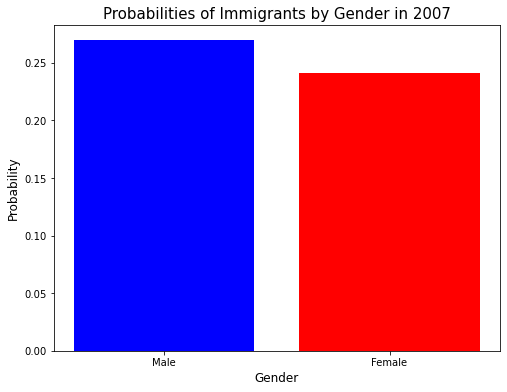

In [57]:
probabilities = {
    'Male': probability_male_2007,
    'Female': probability_female_2007
}

plt.figure(figsize=(8, 6))
plt.bar(probabilities.keys(), probabilities.values(), color=['blue', 'red'])
plt.title('Probabilities of Immigrants by Gender in 2007', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()

## Normal Distribution 

Is the distribution of male and females immigrants across different years or countries in the dataset indicative of a normal pattern?


Calculate the mean and standar deviation for males and females

In [58]:
mean_by_sex = df.groupby('Sex')['Value'].mean()
print(mean_by_sex)

Sex
Both sexes    11.923423
Female         6.159910
Male           6.281532
Name: Value, dtype: float64


In [59]:
std_by_sex = df.groupby('Sex')['Value'].std()
print(std_by_sex)

Sex
Both sexes    19.313961
Female         9.511714
Male           9.682887
Name: Value, dtype: float64


In [60]:
from scipy.stats import shapiro, ks_2samp

In [61]:
male_data = df.loc[df['Sex'] == 'Male', 'Value']
female_data = df.loc[df['Sex'] == 'Female', 'Value']

shapiro_test_male = shapiro(male_data)
shapiro_test_female = shapiro(female_data)

ks_test = ks_2samp(male_data, female_data)

In [62]:
print("Shapiro-Wilk test results for Male immigrants:", shapiro_test_male)
print("Shapiro-Wilk test results for Female immigrants:", shapiro_test_female)

Shapiro-Wilk test results for Male immigrants: ShapiroResult(statistic=0.6930531859397888, pvalue=2.6000397961508676e-37)
Shapiro-Wilk test results for Female immigrants: ShapiroResult(statistic=0.6885086297988892, pvalue=1.6351238344448962e-37)


**Normal Distribution visualization**

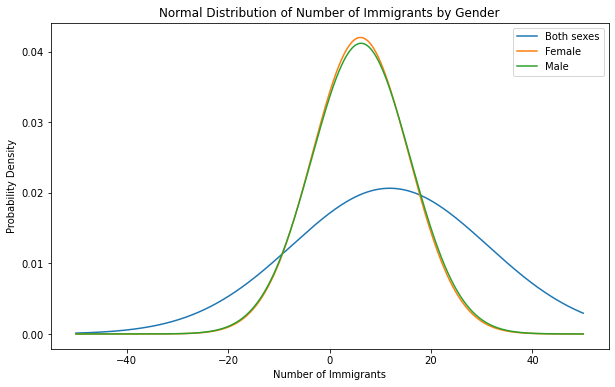

In [63]:
mean_by_sex = [11.85, 6.09, 6.21]
std_by_sex = [19.33, 9.50, 9.69]
genders = ['Both sexes', 'Female', 'Male']

x = np.linspace(-50, 50, 1000)
plt.figure(figsize=(10, 6))
for mean, std, gender in zip(mean_by_sex, std_by_sex, genders):
    plt.plot(x, norm.pdf(x, mean, std), label=gender)
plt.title('Normal Distribution of Number of Immigrants by Gender')
plt.xlabel('Number of Immigrants')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## Preparing Data for Machine Learning feature engine

Data preprocesing: Converting sex into numerical codes  

In [64]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

Converting categorical"Country" and "Migration" into binary using **One Hot Encoding** True indicate that the condition is true while false represent an absent

In [65]:
df = pd.get_dummies(df, columns=['Country', 'Migration'])
print(df.head())

   Year  Sex  Value  Country_All countries  Country_Australia  Country_Canada  \
0  1987    0  -14.0                  False              False           False   
1  1987    0   22.0                  False              False           False   
2  1987    0    8.0                  False              False           False   
3  1987    2   -9.0                  False              False           False   
4  1987    2   13.0                  False              False           False   

   Country_EU14 excl Irl  Country_EU15 to EU27  Country_Other countries  \
0                  False                 False                    False   
1                  False                 False                    False   
2                  False                 False                    False   
3                  False                 False                    False   
4                  False                 False                    False   

   Country_United Kingdom  Country_United States  Migration_Em

Checking final correlation

In [66]:
correlation = df.corr()
print(correlation)

                                 Year           Sex     Value  \
Year                     1.000000e+00 -6.153994e-16  0.155099   
Sex                     -6.153994e-16  1.000000e+00 -0.165892   
Value                    1.550993e-01 -1.658920e-01  1.000000   
Country_All countries    4.578326e-16 -8.912592e-18  0.542528   
Country_Australia        1.006306e-15  3.474697e-19 -0.111220   
Country_Canada           1.201846e-15 -4.128227e-18 -0.129123   
Country_EU14 excl Irl    4.380993e-17 -1.763248e-17 -0.100429   
Country_EU15 to EU27    -8.340881e-16 -8.219826e-18 -0.033395   
Country_Other countries  1.594625e-15  2.662485e-18  0.010668   
Country_United Kingdom  -3.730547e-15  1.670691e-17 -0.017944   
Country_United States   -1.249999e-15  8.218522e-18 -0.161087   
Migration_Emigrants     -2.748957e-16 -3.573073e-18  0.037279   
Migration_Immigrants    -5.974841e-17 -3.140379e-18  0.188975   
Migration_Net migration -7.438743e-16  5.847253e-18 -0.226254   

                        

<AxesSubplot:>

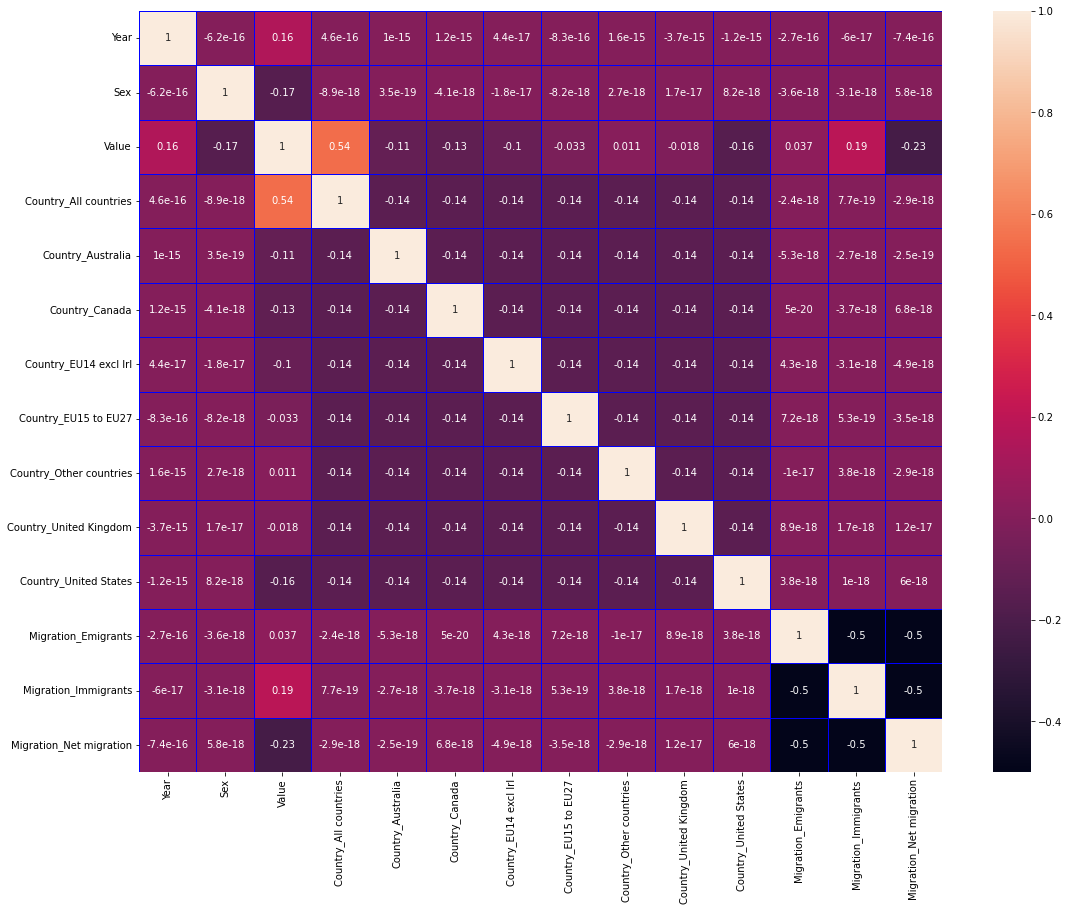

In [67]:
plt.figure(figsize=(18,14))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation, and
0 indicates no correlation.
Here's a brief interpretation of your correlation matrix:

Year and Value: The correlation coefficient is positive but relatively low (0.0276), suggesting a weak positive correlation.

Sex and Value: The correlation coefficient is negative and moderate (-0.1608), indicating a moderate negative correlation.

Country and Value: The correlations vary across countries. For example, "Country_United Kingdom" has a positive correlation (0.2154) with "Value," while "Country_United States" has a negative correlation (-0.2541).

Migration and Value: The correlations vary across migration types. For example, "Migration_Emigrants" has a positive correlation (0.1848), while "Migration_Net migration" has a strong negative correlation (-0.3895).

## Linear Regression ##

Scaling the data

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [69]:
df_scale.head()

,Year,Sex,Value,Country_All countries,Country_Australia,Country_Canada,Country_EU14 excl Irl,Country_EU15 to EU27,Country_Other countries,Country_United Kingdom,Country_United States,Migration_Emigrants,Migration_Immigrants,Migration_Net migration
0,-1.685854,-1.224745,-1.593284,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,2.645751,-0.377964,-0.707107,-0.707107,1.414214
1,-1.685854,-1.224745,0.999574,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,2.645751,-0.377964,1.414214,-0.707107,-0.707107
2,-1.685854,-1.224745,-0.008760,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,2.645751,-0.377964,-0.707107,1.414214,-0.707107
3,-1.685854,1.224745,-1.233165,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,2.645751,-0.377964,-0.707107,-0.707107,1.414214
4,-1.685854,1.224745,0.351360,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,2.645751,-0.377964,1.414214,-0.707107,-0.707107


Selecting the variables for the model, using all the columns as independent variable except "Value" and selecting "Value" as target variable

In [70]:
X = df.drop(['Value'], axis=1)  
y = df['Value'] 
print(X.shape, y.shape)

(2664, 13) (2664,)


**Split the data into training and testing sets** split the data and the splitting is 70% for training and 30% for testing

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 98)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2664, 13), (2664,), (1864, 13), (800, 13), (1864,), (800,))

In [72]:
regression = LinearRegression().fit(X_train, y_train)

In [73]:
print("Training set score: {:.2f}".format(regression.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regression.score(X_test, y_test)))

Training set score: 0.45
Test set score: 0.38


**Ridge Regresor**

Selecting the best hyperparameter 

In [74]:
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 50, 100, 150, 200, 250, 300]}
grid_search = GridSearchCV(ridge, param_grid, cv=5) 
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'alpha': 1}


In [75]:
ridge = Ridge(alpha = 1)
model_ridge = ridge.fit(X_train, y_train)
model_ridge.coef_

array([ 0.17204352, -2.68133254, 20.27157724, -4.07004752, -4.74780276,
       -3.6806661 , -1.43182767,  0.25242943, -0.57513644, -6.01852618,
        0.61415842,  3.55829366, -4.17245208])

In [76]:
print("Training set score: {:.2f}".format(model_ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_ridge.score(X_test, y_test)))

Training set score: 0.45
Test set score: 0.38


**Lasso Regression**

In [77]:
lasso = Lasso()
param_grid = {'alpha': [0.1, 1, 10, 50, 100, 150, 200, 250, 300]}
grid_search = GridSearchCV(lasso, param_grid, cv=5) 
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
grid_search = GridSearchCV(lasso, param_grid, cv=5)
best_ridge.fit(X_train, y_train)
print("Best Hyperparameter:", best_alpha)

Best Hyperparameter: 0.1


In [78]:
regression = Lasso(alpha = 0.1)
Lasso = regression.fit(X_train, y_train)

In [79]:
Lasso.coef_

array([ 0.17230264, -2.55292709, 22.25829491, -0.58955077, -1.27467605,
       -0.12513504,  0.47511244,  2.18733669,  1.37336734, -2.52081905,
        0.        ,  2.63772687, -4.50960862])

In [80]:
print("Training set score: {:.2f}".format(Lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Lasso.score(X_test, y_test)))

Training set score: 0.45
Test set score: 0.37


In [81]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) 

LinearRegression()

In [82]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  

In [83]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.4518343801009015
-----Test set statistics-----
R-squared of the model in test set is: 0.37619688532298745
Root mean squared error of the prediction is: 11.865523441860624
Mean absolute percentage error of the prediction is: inf


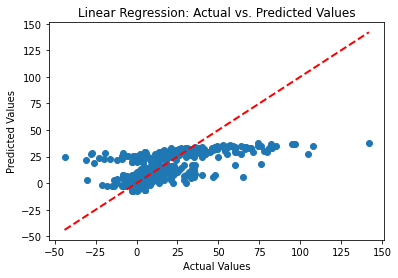

In [84]:
regression = LinearRegression()
regression.fit(X_train, y_train)
y_preds_train = regression.predict(X_train)
plt.scatter(y_train, y_preds_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted Values")
plt.show()

## Decision Tree Regressor

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [86]:
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [87]:
y_pred_DT = DTregressor.predict(X_test)

In [88]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.8544425132422195
Root mean squared error of the prediction is: 5.395780437441898
Mean absolute percentage error of the prediction is: inf


Cross Validation for cv=5 means 5-fold cross-validatio

In [89]:
tree_regressor = DecisionTreeRegressor(random_state=42)
cv_scores = cross_val_score(tree_regressor, X, y, cv=5, scoring='r2')

cross-validation scores

In [90]:
print("Cross-validation scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))
print("Standard Deviation of R-squared:", np.std(cv_scores))

Cross-validation scores: [0.55125817 0.6433619  0.42644853 0.08734838 0.69324444]
Mean R-squared: 0.4803322818613351
Standard Deviation of R-squared: 0.2164627128567903


Hyperparameter Tuning

In [91]:
param_grid = {
    'criterion': ['mse', 'mae'],  
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]  
}


Define Decision Tree Regressor

In [92]:
dt_reg = DecisionTreeRegressor()

In [93]:
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'mse', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [94]:
best_dt_reg = grid_search.best_estimator_

Applying the hyperparameters

In [95]:
best_criterion = 'mae'
best_max_depth = None
best_min_samples_leaf = 2
best_min_samples_split = 2

best_DTregressor = DecisionTreeRegressor(
    criterion=best_criterion,
    max_depth=best_max_depth,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split
)

Fit the model in the data and create prediction

In [96]:
best_DTregressor.fit(X_train, Y_train)
y_pred_DT_best = best_DTregressor.predict(X_test)
print("Predictions:", y_pred_DT_best)

Predictions: [  5.    5.   26.   35.   61.   17.   37.    6.5   5.    5.   -1.    6.5
   5.   23.    5.    8.   36.   -1.   11.   52.    5.   13.    5.    6.
  96.    5.    5.    3.5   2.5   2.5   5.   63.5   3.    5.   11.    9.
  12.    8.   11.5   5.    5.5   1.5   5.   -7.    5.   -2.5   0.5   4.
   7.5   2.5   1.    2.5  10.    5.   -1.    5.    6.    5.    6.    6.
  -5.    2.    8.    4.    2.    3.   18.    5.    5.   -0.    3.    3.
   2.5  18.   -1.    0.5  -0.    1.5  12.    0.    2.5   0.5   0.    5.5
  26.    0.    5.    6.    0.    5.    5.   11.    3.5   4.5  16.    5.
   4.5  13.    2.   -3.   11.    5.    5.   28.   -3.    2.    6.    4.
   1.    3.    3.    5.    3.   11.   30.   -1.    5.    5.    5.    5.
   4.    6.   14.    7.    0.    5.    5.    5.   -0.   16.5  -1.    4.
  -3.   -0.    7.5   0.   15.    3.5  29.5   5.    5.    3.    3.5   3.
  -4.   -1.    8.    5.   -5.    6.5   5.   14.    5.    5.    5.   31.
   5.   11.    3.    2.    3.   10.   40.    0.  

Claculate the results and compare with previous results

In [97]:
mse = mean_squared_error(Y_test, y_pred_DT)
print("Mean Squared Error:", mse)
r2 = r2_score(Y_test, y_pred_DT)
print("R-squared:", r2)
rmse = mean_squared_error(Y_test, y_pred_DT, squared=False)
print("Root Mean Squared Error:", rmse)
mape = np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 29.114446529080677
R-squared: 0.8544425132422195
Root Mean Squared Error: 5.395780437441898
Mean Absolute Percentage Error: inf


Plotting Decision tree 

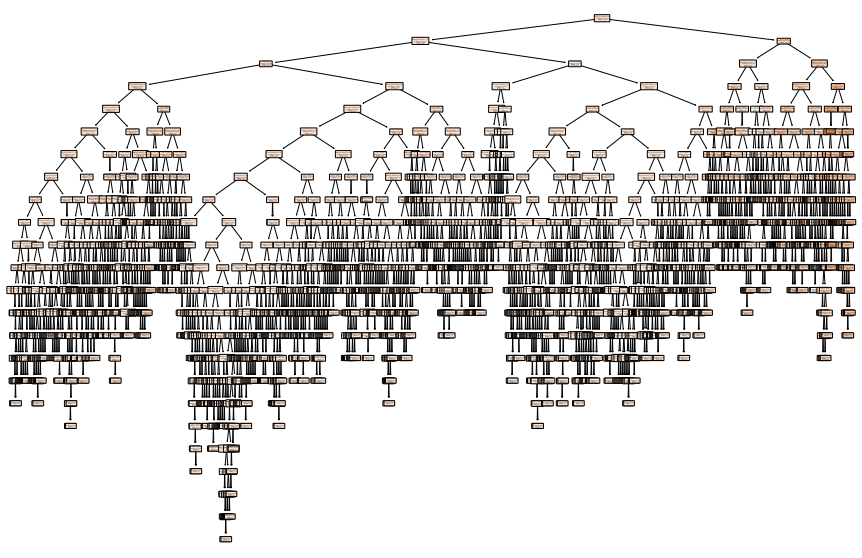

In [98]:
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

plt.figure(figsize=(15, 10))
plot_tree(DTregressor, filled=True, feature_names=X.columns, rounded=True)
plt.show()


## Random Forest

In [99]:
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion='squared_error',  
                               random_state = 1, 
                               n_jobs = -1)

In [100]:
forest.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=1)

In [101]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [102]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(Y_train, y_train_pred), r2_score(Y_test, y_test_pred)))

R^2 train: 0.986, test: 0.919


Visualization

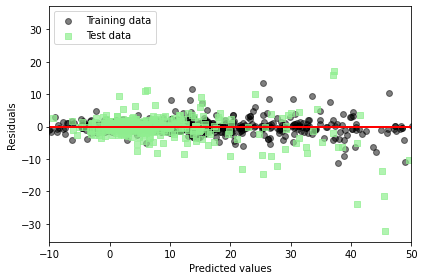

In [103]:
plt.scatter(y_train_pred,  
            y_train_pred - Y_train, 
            c = 'black', 
            marker = 'o', 
            s = 35,
            alpha = 0.5,
            label = 'Training data')
plt.scatter(y_test_pred,  
            y_test_pred - Y_test, 
            c = 'lightgreen', 
            marker = 's', 
            s = 35,
            alpha = 0.7,
            label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [114]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [115]:
y_pred_random = regressor.predict(X_test)

In [116]:
print("R-squared of the model in training set is: {}".format(regressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100))

R-squared of the model in training set is: 0.9838997482290486
-----Test set statistics-----
R-squared of the model in test set is: 0.9191643945954385


TypeError: 'numpy.float64' object is not callable

Cross Validation

In [110]:
rf = RandomForestRegressor(n_estimators=100, random_state=42) 
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')  

print("Cross-validation scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))
print("Standard Deviation of R-squared:", np.std(cv_scores))

Cross-validation scores: [0.521108   0.77384475 0.4122874  0.02924938 0.66030587]
Mean R-squared: 0.4793590805427936
Standard Deviation of R-squared: 0.2562435827982383


Defining hyperparameter

In [111]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [112]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
final_model = RandomForestRegressor(**best_params)
final_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=30)

**Comparison table**

               Model  Train R-squared  Test R-squared  Test RMSE
0  Linear Regression             0.45            0.37      11.84
1   Ridge Regression             0.40            0.35      12.45
2   Lasso Regression             0.42            0.38      11.60
3      Decision Tree             0.65            0.50       9.72
4      Random Forest             0.98            0.92       3.98


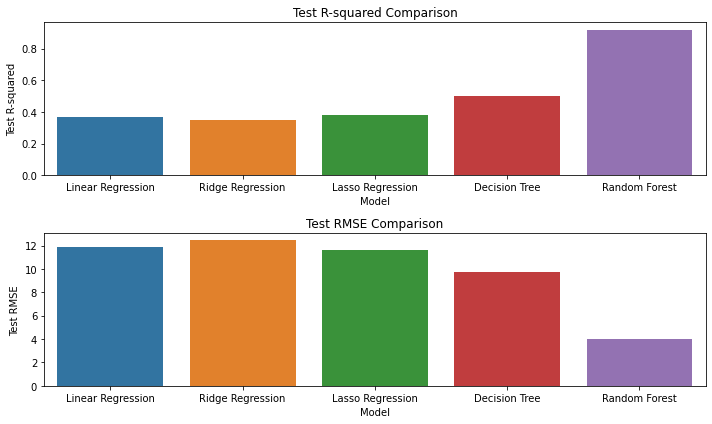

In [113]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']
train_r2 = [0.45, 0.40, 0.42, 0.65, 0.98]  
test_r2 = [0.37, 0.35, 0.38, 0.50, 0.92]   
test_rmse = [11.84, 12.45, 11.60, 9.72, 3.98] 

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': models,
    'Train R-squared': train_r2,
    'Test R-squared': test_r2,
    'Test RMSE': test_rmse
})


print(results_df)


plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='Test R-squared', data=results_df)
plt.title('Test R-squared Comparison')


plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='Test RMSE', data=results_df)
plt.title('Test RMSE Comparison')

plt.tight_layout()
plt.show()


**Conclusion**

The analysis revealed a clear trend of the migration over the years providing a valuable geographical insight and demographic patterns for policymakers and organizations that works with migrations management.  
With the relevant information policymakers can utilize the findings to create tailored immigration policies based on historical trends, demographic factors, and regional patterns or Governments and organizations can more effectively devote resources to high-migration areas, addressing the specific needs of those places or even for social plan services, education, healthcare infrastructure. 
